# $\mathbb{Z}_{2}$-symmetric singlet extension of the Standard Model ($\mathbb{Z}_{2}$-RxSM)

In [ ]:
import pandas as pd
import numpy as np

import matplotlib as mpl
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.rc("axes",labelsize="large")

plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 600

import os
os.chdir('/cephfs/user/mrebuzzi/phd/HiggsTools/future_projections/')
# os.getcwd()

### Plot EffZZH[240] vs EffZZH[365]

In [2]:
def read_Z2SSM_file(df, loop_order=2):

    kappas = {}
    EWPOs = {}

    if loop_order==1:
        kappas["lam"] = df['kappaLam1L']

        for fermion in ['uu', 'dd', 'ss', 'cc', 'bb', 'tt', 'ee', 'mumu', 'tautau']:
            kappas[fermion] = df['kappaSingleHiggs1L']

        kappas['ZZ']     = df['kappaSingleHiggs1L']
        kappas['WW']     = df['kappaSingleHiggs1L']
        kappas['gamgam'] = df['kappaSingleHiggs1L']
        kappas['Zgam']   = df['kappaSingleHiggs1L']
        kappas['gg']     = df['kappaSingleHiggs1L']

        for energy in ['0', '240', '365', '500', '550']:
            kappas['ZZ_' + energy] = df['kappaSingleHiggs1L'] + df['effZZh1Lkala_s' + energy]
            
        # EWPOs['Mw'] = df['MW1L']
        # EWPOs['sin2thetaEff'] = df['sl1L']
        # EWPOs['GammaZ'] = df['GamZ1L']


    elif loop_order==2:
        kappas["lam"] = df['kappaLam2L']

        for fermion in ['uu', 'dd', 'ss', 'cc', 'bb', 'tt', 'ee', 'mumu', 'tautau']:
            kappas[fermion] = df['kappaSingleHiggs2L']

        kappas['ZZ']     = df['kappaSingleHiggs2L']
        kappas['WW']     = df['kappaSingleHiggs2L']
        kappas['gamgam'] = df['kappaSingleHiggs2L']
        kappas['Zgam']   = df['kappaSingleHiggs2L']
        kappas['gg']     = df['kappaSingleHiggs2L']

        for energy in ['0', '240', '365', '500', '550']:
            kappas['ZZ_' + energy] = df['kappaSingleHiggs2L'] + df['effZZh2Lkala_s' + energy]

        # EWPOs['Mw'] = df['MW2L']
        # EWPOs['sin2thetaEff'] = df['sl2L']
        # EWPOs['GammaZ'] = df['GamZ2L']

    else:
        raise ValueError("Wrong loop order argument!")

    return kappas, EWPOs


In [3]:
def plot_EffZZH_240_vs_365(data_file, 
                           plot_dir, 
                           zoom=False, 
                           zoom_range_x=(2 - 3*0.25, 2 + 3*0.25),
                           zoom_range_y=(0.0, 0.005),
                           plot_points=None,
                           BR_constraints=None,
                           ):
    
    df = pd.read_csv(data_file + ".csv")

    df = df.replace("", np.nan)
    df = df.dropna().reset_index(drop=True)
    # Necessary in case some rows have empty values

    n_pts = df.shape[0]
    n_pts_total = n_pts

    kappas, _ = read_Z2SSM_file(df)

    # Apply filter to data using SM contraints on Higgs couplings
    if not BR_constraints is None:

        satisfy_BR_constraint = [True for i in range(n_pts)]
        for i in range(n_pts):
            for coup in ['uu', 'dd', 'cc', 'ss', 'tt', 'bb', 'ee', 'mumu', 'tautau', 'WW', 'ZZ', 'Zgam', 'gamgam', 'gg']:
                if np.abs(kappas[coup][i] - 1.) > BR_constraints:
                    satisfy_BR_constraint[i] = False

        for coup in kappas.keys():
            kappas[coup] = np.array(kappas[coup][satisfy_BR_constraint])

        n_pts_BR_constraint = len(kappas['ZZ'])
        print(f"Number of points satisfying the {BR_constraints*100:.3g}% SM constraint on the single higgs couplings: {n_pts_BR_constraint} / {n_pts}")

        n_pts = n_pts_BR_constraint
    
    
    color = np.array(kappas['lam'])  ## Color code is now kappa_lambda

    if BR_constraints is None:
        x_data = kappas['ZZ_365'].to_numpy() - 1
        y_data = kappas['ZZ_240'].to_numpy() - 1
    else:
        x_data = kappas['ZZ_365'] - 1
        y_data = kappas['ZZ_240'] - 1

    fig, ax = plt.subplots(
        figsize=(4.5, 4.),
        constrained_layout=True)

    color_map = mpl.colormaps['tab20c']

    sc = ax.scatter(
        x_data,
        y_data,
        c=color,
        s=0.4,
        cmap=color_map,
        rasterized=True)

    if zoom==True:
        ax.set_xlim(*zoom_range_x)
        ax.set_ylim(*zoom_range_y)

    clb = fig.colorbar(
        sc,
        ax=ax,
        label=r"$\kappa_\lambda$",
        pad=0,
        fraction=0.1,
        location='right',
        aspect=40,
        extend='max',
    )
    clb.ax.minorticks_on()

    ax.set_xlabel(r'$\kappa_{Z}^{365} - 1$')
    ax.set_ylabel(r'$\kappa_{Z}^{240} - 1$')


    lower_text = r'Z2SSM'

    if BR_constraints:
        lower_text = lower_text + f"\n{BR_constraints*100:.3g}% SM constraints"
        lower_text = lower_text + f"\n{n_pts_BR_constraint} / {n_pts_total} Points"

    else:
        lower_text = lower_text + f'\n{n_pts} Points'+'\n'
    

    ax.text(
        0.97,
        0.05,
        lower_text,
        horizontalalignment='right',
        verticalalignment='bottom',
        transform=ax.transAxes,
        fontsize=8
        )

    ax.text(
        0,
        1,
        r"$\mathrm{HiggsSignals}$",
        horizontalalignment="left",
        verticalalignment="bottom",
        transform=ax.transAxes,
        fontsize=9,
    )

    text_collider = "FCC-ee$_{{365}}$ + HL-LHC Projections"
    ax.text(
        1,
        1,
        text_collider,
        horizontalalignment="right",
        verticalalignment="bottom",
        transform=ax.transAxes,
        fontsize=9,
    )

    if not plot_points is None:

        leg_handles = []
        # legend_loc='best'
        legend_loc='upper left'

        color = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:pink"]
        colors = mpl.colormaps['tab20b']
        color = color + list(colors(np.linspace(0.001, 0.999, 20)[::-1]))
        for i, plot_point in enumerate(plot_points):

            ax.plot(*(plot_point[:2]), marker="*", ls="none", c=color[i], markersize=10, markeredgecolor='white', markeredgewidth=0.5)
            point_label = f"{plot_point[2]}"
            leg_handles.append(Line2D([0], [0], color="k", ls="none", marker="*", c=color[i], markersize=10, markeredgecolor='white', markeredgewidth=0.5, label=point_label))
            

        hsLegend = ax.legend(
            handles=leg_handles,
            loc=legend_loc,
            frameon=False,
            prop={'size': 6},
            ncol=2,
        )
        ax.add_artist(hsLegend)


    if BR_constraints:
        plot_name = f'Z2SSM_results_EffZZH_240_vs_365_{BR_constraints:.3g}_SM_constraints'
    else:
        plot_name = f'Z2SSM_results_EffZZH_240_vs_365'

    if not (plot_points is None):
        plot_name = plot_name + "_BPs"
    if zoom: plot_name = plot_name + "_zoom"
    plt.savefig(f'{plot_dir}/{plot_name}'+".pdf")

Number of points satisfying the 5% SM constraint on the single higgs couplings: 64941 / 64941


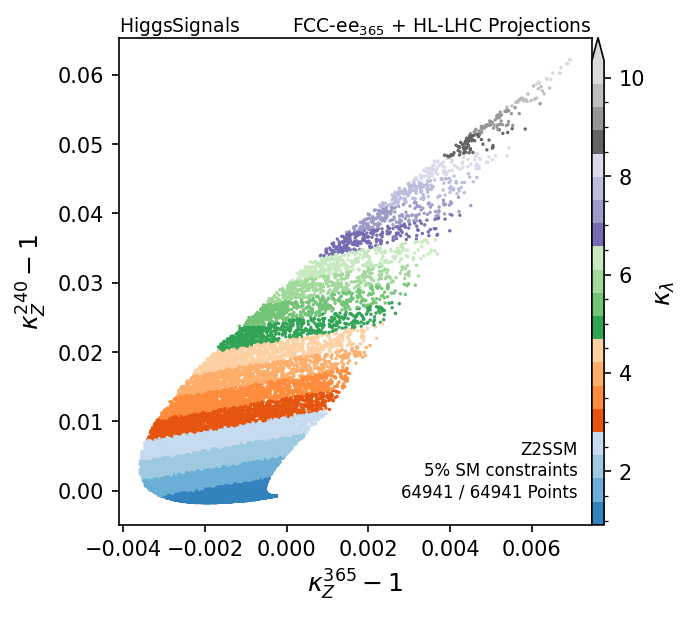

In [ ]:
# data_file = "data/Z2SSM/Z2_SSM_scan_energy_dependence"
data_file = "data/Z2SSM/Z2_SSM_scan_energy_dependence_fixed"
plot_dir = "plots/Z2SSM"
plot_EffZZH_240_vs_365(data_file, plot_dir, BR_constraints=0.05)

### Finding Outlier Points 

In [5]:
import subprocess

In [ ]:

data_file="data/Z2SSM/Z2_SSM_scan_energy_dependence"
df = pd.read_csv(data_file + ".csv")

df = df.replace("", np.nan)
df = df.dropna().reset_index(drop=True)

kappas, EWPOs = read_Z2SSM_file(df)

def print_to_file(message, file):
    print(message)
    print(message, file=file)

def find_benchmark(BP_Names,
                   BP_output_file,
                   max_errors_365,
                   max_errors_240,
                   delta_kappas_z_365,
                   delta_kappas_z_240,
                   ):


    n_pts = df.shape[0]
    delta_kZ_240_365 = np.full((n_pts,), np.nan)
        

    if not len(delta_kappas_z_365) == len(delta_kappas_z_240):
        raise ValueError("delta_kappas_z_365 and delta_kappas_z_240 have different lengths!")

    bp_indices = [None for i in range(len(delta_kappas_z_365))]
    bp_kappas = [None for i in range(len(delta_kappas_z_365))]
    bp_EWPOs = [None for i in range(len(delta_kappas_z_365))]

    for ind, (kZ_365, kZ_240) in enumerate(zip(kappas['ZZ_365'], kappas['ZZ_240'])):
        for BP, (delta_kappa_z_365, delta_kappa_z_240, max_error_365, max_error_240) in enumerate(zip(delta_kappas_z_365, delta_kappas_z_240, max_errors_365, max_errors_240)):
            if abs((kZ_365-1) - delta_kappa_z_365) < max_error_365 and abs((kZ_240-1) - delta_kappa_z_240) < max_error_240:
                bp_indices[BP] = ind


    if any(bp_index is None for bp_index in bp_indices):
        missing_BPs = [i for i, bp_index in enumerate(bp_indices) if bp_index is None]
        raise ValueError(f"The following BPs were not found: {missing_BPs}")


    for BP, bp_index in enumerate(bp_indices):

        print_to_file(f"\nelif BP == \"{BP_Names[BP]}\":", file=BP_output_file)

        bp_kappas[BP] = {coup:kps[bp_index] for (coup, kps) in kappas.items()}
        bp_EWPOs[BP] = {obs_name:obs_value[bp_index] for (obs_name, obs_value) in EWPOs.items()}

        for coup, kaps in bp_kappas[BP].items():
            print_to_file(f"    kappas['{coup}'] = {kaps}", file=BP_output_file)

        print_to_file(f"    # abs(kappas['ZZ_365'] - kappas['ZZ_240'])/(kappas['ZZ_240'] - 1) = {np.abs((bp_kappas[BP]['ZZ_365'] - bp_kappas[BP]['ZZ_240'])/(bp_kappas[BP]['ZZ_240'] - 1))}", file=BP_output_file)
        print_to_file(f"    # abs(kappas['ZZ_365'] - kappas['ZZ_240']) = {np.abs(bp_kappas[BP]['ZZ_365'] - bp_kappas[BP]['ZZ_240'])}", file=BP_output_file)

        for obs_name, obs_value in bp_EWPOs[BP].items():
            print_to_file(f"    {obs_name} = {obs_value}", file=BP_output_file)

        print_to_file(f"    # Best scan point row: {bp_index+2} out of {len(kappas['ZZ_240'])+2}", file=BP_output_file)

        if delta_kZ_240_365[bp_index] == np.inf: 
            raise ValueError("Could not find point satisfying the constraints!")
        
    return bp_kappas


output_dir = "./scan_output/Z2SSM_scan_output"
subprocess.run(["mkdir", "-p", output_dir])

BP_filename = f"{output_dir}/Benchmark_Points_outliers.txt"
with open(BP_filename, "w") as BP_output_file:

    max_errors_365 = [2e-3, 2e-3, 2e-3, 2e-3, 1e-3, 2e-4, 2e-4, 2e-4, 2e-4, 2e-4, 2e-4, 2e-4, 1e-4, 2e-4, 2e-4, 2e-4, 2e-4, 2e-4,]
    max_errors_240 = [2e-3, 2e-3, 2e-3, 2e-3, 1e-3, 1e-3, 1e-3, 1e-3, 1e-3, 1e-3, 1e-3, 1e-3, 1e-3, 1e-3, 1e-3, 1e-3, 1e-3, 1e-3,]
    delta_kappas_z_365 = [0.035, 0.018, -0.007, -0.035, -0.0345, -0.002, -0.0032, -0.0001, -0.002, 0.00145, -0.0004, 0.0030, 0.0016, 0.0042, 0.0036, 0.0062, 0.0056, 0.0075]
    delta_kappas_z_240 = [0.027, 0.008, -0.015, -0.042, -0.034,  -0.003,  0.0125, -0.0015 , 0.021, 0.0122,   0.030,  0.0253, 0.0395, 0.0390, 0.049,  0.052, 0.058,  0.066]

    BP_Names = ["BPO_0", "BPO_1", "BPO_2", "BPO_3", "BPO_4"]
    BP_Names = BP_Names + [f"BPB_{i}" for i in range(len(delta_kappas_z_240)-2)]
    BP_Names_legend = ["BPO 0", "BPO 1", "BPO 2", "BPO 3", "BPO 4"]
    BP_Names_legend = BP_Names_legend + [f"BPB {i}" for i in range(len(delta_kappas_z_240)-2)]

    bp_kappas = find_benchmark(BP_Names,
                               BP_output_file,
                               max_errors_365=max_errors_365,
                               max_errors_240=max_errors_240,
                               delta_kappas_z_365=delta_kappas_z_365,
                               delta_kappas_z_240=delta_kappas_z_240,
                              )


elif BP == "BPO_0":
    kappas['lam'] = -0.2508742207313748
    kappas['uu'] = 1.0393799170799365
    kappas['dd'] = 1.0393799170799365
    kappas['ss'] = 1.0393799170799365
    kappas['cc'] = 1.0393799170799365
    kappas['bb'] = 1.0393799170799365
    kappas['tt'] = 1.0393799170799365
    kappas['ee'] = 1.0393799170799365
    kappas['mumu'] = 1.0393799170799365
    kappas['tautau'] = 1.0393799170799365
    kappas['ZZ'] = 1.0393799170799365
    kappas['WW'] = 1.0393799170799365
    kappas['gamgam'] = 1.0393799170799365
    kappas['Zgam'] = 1.0393799170799365
    kappas['gg'] = 1.0393799170799365
    kappas['ZZ_0'] = 1.0342667799291414
    kappas['ZZ_240'] = 1.0278909537598329
    kappas['ZZ_365'] = 1.0352835896411137
    kappas['ZZ_500'] = 1.0383569573404057
    kappas['ZZ_550'] = 1.0391378364021953
    # abs(kappas['ZZ_365'] - kappas['ZZ_240'])/(kappas['ZZ_240'] - 1) = 0.2650549688955889
    # abs(kappas['ZZ_365'] - kappas['ZZ_240']) = 0.007392635881280807
    # Best scan point row:

### Plotting the obtained points

Number of points satisfying the 5% SM constraint on the single higgs couplings: 203285 / 203444


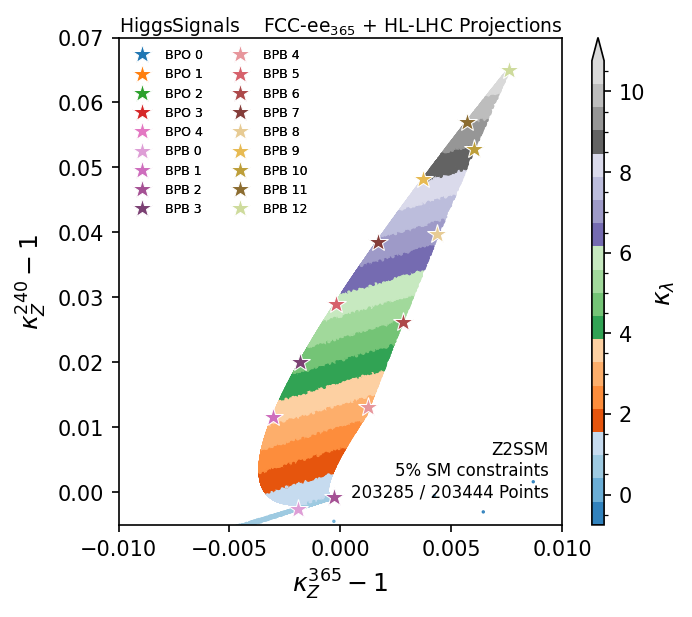

In [ ]:
# data_file = "data/Z2SSM/Z2_SSM_scan_energy_dependence"
plot_dir = "plots/Z2SSM"
BR_constraints = 0.05
plot_points = [(BP["ZZ_365"]-1, BP["ZZ_240"]-1, label) for BP, label in zip(bp_kappas, BP_Names_legend)]

plot_EffZZH_240_vs_365(data_file, plot_dir,
                       BR_constraints=BR_constraints,
                       plot_points=plot_points,
                       zoom=True,
                       zoom_range_x=(-0.01, 0.01),
                       zoom_range_y=(-0.005, 0.07),
                )

Number of points satisfying the 5% SM constraint on the single higgs couplings: 203285 / 203444


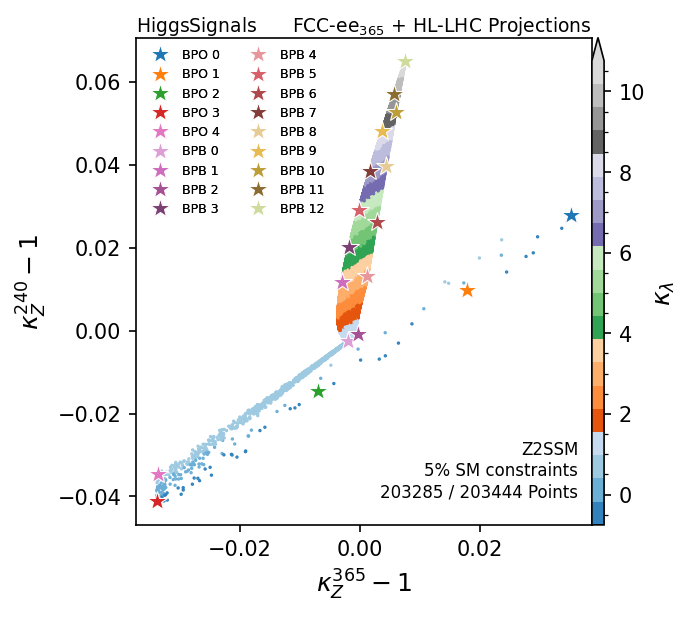

In [ ]:
# data_file = "data/Z2SSM/Z2_SSM_scan_energy_dependence"
plot_dir = "plots/Z2SSM"
BR_constraints = 0.05
plot_points = [(BP["ZZ_365"]-1, BP["ZZ_240"]-1, label) for BP, label in zip(bp_kappas, BP_Names_legend)]

plot_EffZZH_240_vs_365(data_file, plot_dir,
                       BR_constraints=BR_constraints,
                       plot_points=plot_points,
                )